<a href="https://colab.research.google.com/github/Abiodun70/Abiodun-projects/blob/main/credit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import the required libraries**

In [ ]:
# import the required libraries

import numpy as np # working with arrays
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
import itertools # advanced tools
from termcolor import colored as cl # text customization
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV files/credit_data.csv')
df = df.drop(['clientid'], axis=1)
df.head()

,income,age,loan,default
0,66155.92510,59.017015,8106.532131,0
1,34415.15397,48.117153,6564.745018,0
2,57317.17006,63.108049,8020.953296,0
3,42709.53420,45.751972,6103.642260,0
4,66952.68885,18.584336,8770.099235,1


**DATA CLEANING**

In [ ]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   income   2000 non-null   float64
 1   age      1997 non-null   float64
 2   loan     2000 non-null   float64
 3   default  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [5]:
#check the shape of the dataset.
df.shape

(2000, 4)

In [6]:
#check to see how the columns looks.
df.columns

Index(['income', 'age', 'loan', 'default'], dtype='object')

In [7]:
#Check duplicated rows
df.duplicated().sum()

0

In [8]:
#Number of missing value
df.isnull().sum()

income     0
age        3
loan       0
default    0
dtype: int64

In [9]:
#Percentage of Missing Values

df.isnull().sum()/len(df.index) * 100

income     0.00
age        0.15
loan       0.00
default    0.00
dtype: float64

In [10]:
default = len(df)
default_cases_count = len(df[df.default == 0])
non_default_cases_count = len(df[df.default == 1])
default_percentage = round(non_default_cases_count/default_cases_count*100, 2)

print(cl('DEFAULT COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of defaults are {}'.format(default), attrs = ['bold']))
print(cl('Number of non_default cases are {}'.format(non_default_cases_count), attrs = ['bold']))
print(cl('Number of default_cases are {}'.format(default_cases_count), attrs = ['bold']))
print(cl('Percentage of default cases is {}'.format(default_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

DEFAULT COUNT
--------------------------------------------
Total number of defaults are 2000
Number of non_default cases are 283
Number of default_cases are 1717
Percentage of default cases is 16.48
--------------------------------------------


there are 1,717 persons who has defaulted in the loan repayment while 283 persons have fuffiled their obligations.
0 represents those who haven't met the loan obligation while 1 represents those who have fufilled the obligations.

In [11]:
 #Remove rows with NA values
df = df.dropna(axis=0)

In [12]:
default_cases = df[df.default == 0]
non_default_cases = df[df.default == 1]

print(cl('CASE DEFAULT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-DEFAULT CASE STATS', attrs = ['bold']))
print(non_default_cases.default.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('DEFAULT CASE STATS', attrs = ['bold']))
print(default_cases.default.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE DEFAULT STATISTICS
--------------------------------------------
NON-DEFAULT CASE STATS
count    283.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: default, dtype: float64
--------------------------------------------
DEFAULT CASE STATS
count    1714.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: default, dtype: float64
--------------------------------------------


**data summary**

In [13]:
df.describe(include=[np.number])

,income,age,loan,default
count,1997.000000,1997.000000,1997.000000,1997.000000
mean,45333.864334,40.807559,4445.487716,0.141713
std,14325.131177,13.624469,3046.792457,0.348842
min,20014.489470,-52.423280,1.377630,0.000000
25%,32804.904490,28.990415,1936.813257,0.000000
50%,45788.747100,41.317159,3977.287432,0.000000
75%,57787.565660,52.587040,6440.861434,0.000000
max,69995.685580,63.971796,13766.051240,1.000000


**data distribution**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0b8490b90>,
      dtype=object)

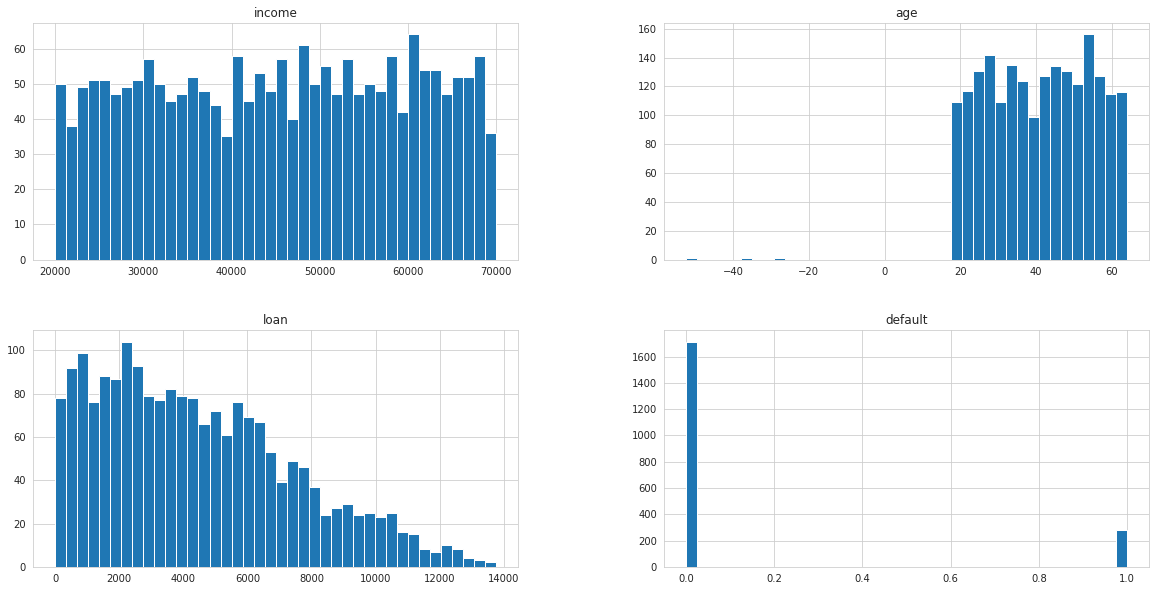

In [ ]:
#let see the distribution of the dataset using an histogram
df.hist(bins=40, figsize=(20,10))

**Data visualization**

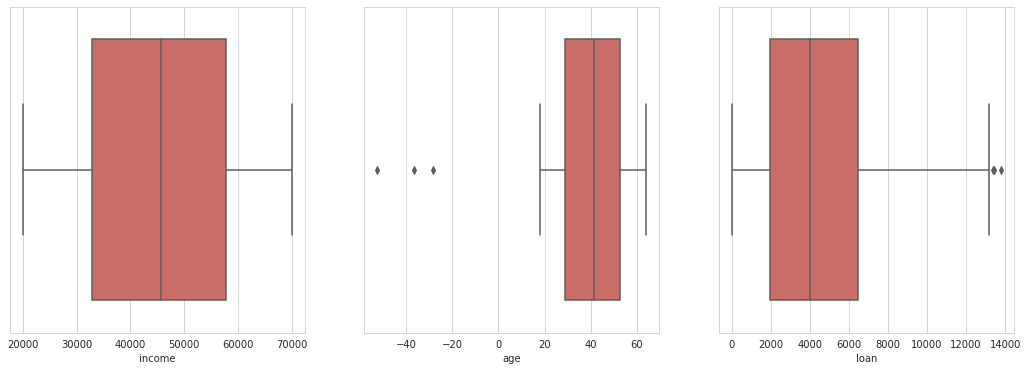

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
sns.boxplot(x="income", data=df, palette="hls", ax=ax1)
sns.boxplot(x="age", data=df, palette="hls", ax = ax2)
sns.boxplot(x="loan", data=df, palette="hls",ax=ax3)
fig.show()

the income from this dataset are normally distributed

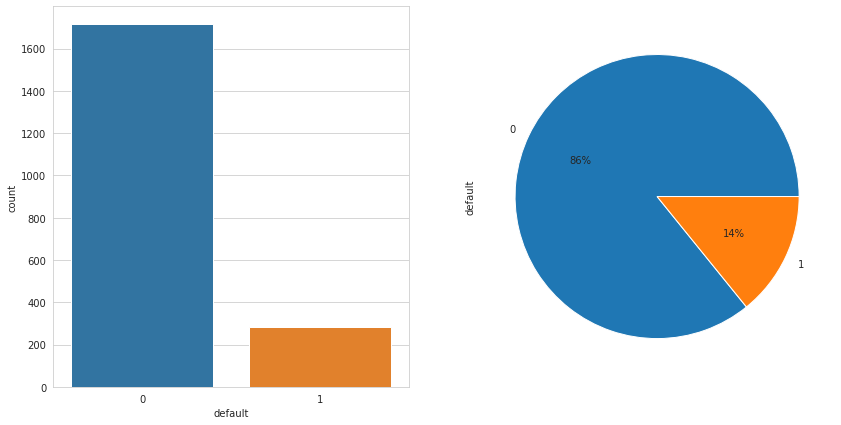

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
label = df['default'].unique().tolist()
sns.countplot(df['default'])

plt.subplot(122)
df['default'].value_counts().plot.pie(autopct = "%1.0f%%", labels=label)

the above chart shows that the are more defaulters in loan repayment with 86% default rate.

only 14% met the obligations in full.

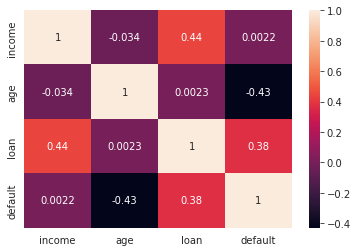

In [ ]:
sns.heatmap(df.corr(), annot = True)

the above figure shows that loan 

In [ ]:
correlations = df.corr(method='pearson')
print(correlations)

           income       age      loan   default
income   1.000000 -0.033687  0.441539  0.002222
age     -0.033687  1.000000  0.002309 -0.429759
loan     0.441539  0.002309  1.000000  0.377169
default  0.002222 -0.429759  0.377169  1.000000


**Modelling**

In [ ]:

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

since there are much distance amongst our coutinuous dataset, we need to standardized them to enable us have a better predictive outcomes.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, Y_train)
tree_result = tree_model.predict(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_result = lr.predict(X_test)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, Y_train)
rf_result = rf.predict(X_test)

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
n = 3
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, Y_train)
knn_result = knn.predict(X_test)


**SVM**

In [ ]:
from sklearn.svm import SVC 
svm = SVC()
svm.fit(X_train, Y_train)
svm_result = svm.predict(X_test)

**Xgboost**

In [ ]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, Y_train)
xgb_result = xgb.predict(X_test)

After fitting our models, we now evaluate using confusion matrix, accuracy score and F1 score to see the best prediction model.

**Model Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

Accuracy Score

In [ ]:
print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(Y_test, tree_result)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(Y_test, knn_result)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(Y_test, lr_result)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(Y_test, svm_result)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(Y_test, rf_result)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(Y_test, xgb_result)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.965
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9825
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.95
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9725
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9425
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.99
------------------------------------------------------------------------


According to the accuracy score evaluation metric, the KNN model reveals to be the most accurate model and the Logistic regression model to be the least accurate model. However, when we round up the results of each model, it shows 0.9825 (98% accurate) which is a very good score.

**F1 Evaluation Metrics**

In [ ]:
print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(Y_test, tree_result)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(Y_test, knn_result)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(Y_test, lr_result)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(Y_test, svm_result)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(Y_test, rf_result)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(Y_test, xgb_result)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8852459016393442
------------------------------------------------------------------------
F1 score of the KNN model is 0.9391304347826087
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.8245614035087718
------------------------------------------------------------------------
F1 score of the SVM model is 0.9043478260869564
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7628865979381443
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.9636363636363636
------------------------------------------------------------------------


The ranking of the models is almost similar to the previous evaluation metric. On basis of the F1 score evaluation metric, the KNN model snatches the first place again and the Logistic regression model remains to be the least accurate model

**confusion matrix**

In [ ]:
tree_matrix = confusion_matrix(Y_test, tree_result, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(Y_test, knn_result, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(Y_test, lr_result, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(Y_test, svm_result, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(Y_test, rf_result, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(Y_test, xgb_result, labels = [0, 1]) # XGBoost


In [ ]:
tree_matrix

array([[332,  12],
       [  2,  54]])

In [ ]:
knn_matrix

array([[339,   5],
       [  2,  54]])

In [ ]:
lr_matrix

array([[333,  11],
       [  9,  47]])

In [ ]:
svm_matrix

array([[337,   7],
       [  4,  52]])

In [ ]:
rf_matrix

array([[340,   4],
       [ 19,  37]])